In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Apprentice:
    def __init__(self, name):
        self.name = name
        self.potions_made = 0
        self.work_speed = 1.0
        self.next_milestone = 10
        self.daily_potions = 0
        self.bonus_income = 0

    def reset_daily(self):
        self.work_speed = 1.0
        self.daily_potions = 0
        self.bonus_income = 0

    def update_milestone(self):
        if self.potions_made >= self.next_milestone:
            self.work_speed *= 1.07  # 7% boost
            self.next_milestone += 10
            return True
        return False

In [4]:
class WizardOperation:
    def __init__(self, wizard_working=False):
        self.apprentices = [Apprentice(f"Apprentice_{i+1}") for i in range(3)]
        self.wizard_working = wizard_working
        self.wizard_potions = 0
        self.daily_income = 0
        self.total_income = 0
        self.day_log = []

    def cast_spells(self):
        # Randomly select 2 apprentices for each spell
        available_apprentices = self.apprentices.copy()

        # Cast each spell on 2 random apprentices
        for spell in ['haste', 'empower', 'lady_luck']:
            targets = np.random.choice(available_apprentices, 2, replace=False)
            for apprentice in targets:
                if spell == 'haste':
                    apprentice.work_speed *= 1.18
                elif spell == 'empower':
                    apprentice.bonus_income += 100
                elif spell == 'lady_luck' and np.random.random() < 0.12:
                    apprentice.daily_potions += 1  # Double output

    def simulate_day(self, day_number, weekend=False):
        self.daily_income = 0
        self.wizard_potions = 0
        daily_log = {
            'day': day_number,
            'weekend': weekend,
            'apprentices': [],
            'wizard_output': 0
        }

        # Reset daily values
        for apprentice in self.apprentices:
            apprentice.reset_daily()

        # Cast daily spells (not on weekends)
        if not weekend:
            self.cast_spells()

        # Calculate apprentices production
        for apprentice in self.apprentices:
            base_potions = np.floor(apprentice.work_speed)
            apprentice.daily_potions += base_potions
            apprentice.potions_made += apprentice.daily_potions

            potion_income = apprentice.daily_potions * 1000 + apprentice.bonus_income
            self.daily_income += potion_income

            milestone_reached = apprentice.update_milestone()

            daily_log['apprentices'].append({
                'name': apprentice.name,
                'potions': apprentice.daily_potions,
                'income': potion_income,
                'milestone_reached': milestone_reached
            })

        # Add wizard's production if working
        if self.wizard_working:
            self.wizard_potions = 2  # Fixed 2 potions per day
            wizard_income = self.wizard_potions * 1000
            self.daily_income += wizard_income
            daily_log['wizard_output'] = wizard_income

        # Subtract weekend cost if applicable
        if weekend:
            self.daily_income -= 7000

        self.total_income += self.daily_income
        self.day_log.append(daily_log)
        return daily_log

In [5]:
def run_full_simulation(days=30, wizard_working=False):
    operation = WizardOperation(wizard_working=wizard_working)

    for day in range(1, days + 1):
        is_weekend = (day % 7) >= 6
        operation.simulate_day(day, weekend=is_weekend)

    return operation

In [6]:
def analyze_multiple_simulations(n_simulations=10000, days=30):
    results_normal = []
    results_wizard = []

    for i in range(n_simulations):
        # Run simulation without wizard working
        sim_normal = run_full_simulation(days=days, wizard_working=False)
        results_normal.append(sim_normal.total_income)

        # Run simulation with wizard working
        sim_wizard = run_full_simulation(days=days, wizard_working=True)
        results_wizard.append(sim_wizard.total_income)

    # Create comparison plot
    plt.figure(figsize=(15, 7))

    # Plot both distributions
    sns.kdeplot(data=results_normal, label='Without Wizard Working', color='blue', alpha=0.5)
    sns.kdeplot(data=results_wizard, label='With Wizard Working', color='red', alpha=0.5)

    # Add vertical line for $1M target
    plt.axvline(x=1000000, color='green', linestyle='--', label='$1M Target')

    plt.title('Income Distribution Comparison')
    plt.xlabel('Total Income ($)')
    plt.ylabel('Density')
    plt.legend()

    # Calculate statistics
    for scenario, results in [('Without Wizard', results_normal), ('With Wizard', results_wizard)]:
        results = np.array(results)
        prob_million = np.mean(results >= 1000000)
        mean_income = np.mean(results)
        std_income = np.std(results)
        percentile_5 = np.percentile(results, 5)
        percentile_95 = np.percentile(results, 95)

        print(f"\n{scenario} Working Statistics:")
        print(f"Probability of reaching $1M: {prob_million:.2%}")
        print(f"Mean income: ${mean_income:,.2f}")
        print(f"Standard deviation: ${std_income:,.2f}")
        print(f"5th percentile: ${percentile_5:,.2f}")
        print(f"95th percentile: ${percentile_95:,.2f}")

    plt.show()

    return results_normal, results_wizard

Running comparison analysis...

Without Wizard Working Statistics:
Probability of reaching $1M: 0.00%
Mean income: $572,538.50
Standard deviation: $6,574.79
5th percentile: $562,200.00
95th percentile: $583,200.00

With Wizard Working Statistics:
Probability of reaching $1M: 100.00%
Mean income: $1,052,638.90
Standard deviation: $6,666.31
5th percentile: $1,042,200.00
95th percentile: $1,064,200.00


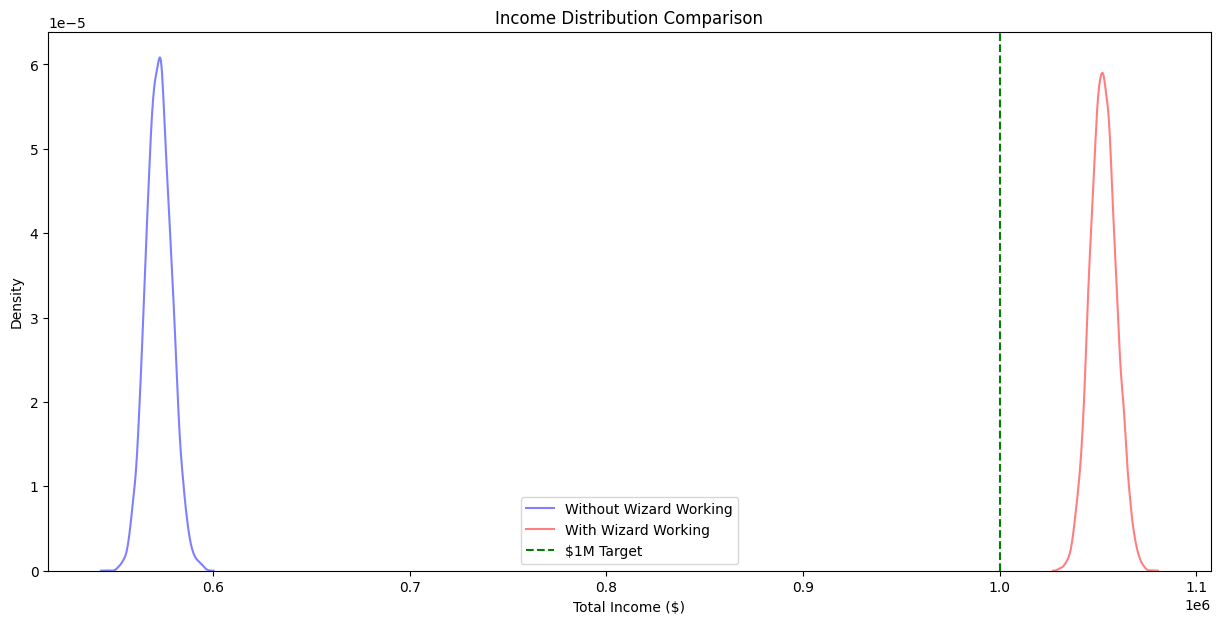

In [10]:
# Run detailed analysis
print("Running comparison analysis...")
normal_results, wizard_results = analyze_multiple_simulations(n_simulations=10000, days=240)

In [11]:
# Show detailed daily operation example for both scenarios
for wizard_working in [False, True]:
    print(f"\nDetailed 5-day sample {'with' if wizard_working else 'without'} wizard working:")
    sample_operation = run_full_simulation(days=8, wizard_working=wizard_working)

    for day in sample_operation.day_log:
        print(f"\nDay {day['day']} {'(Weekend)' if day['weekend'] else ''}:")
        for app in day['apprentices']:
            print(f"  {app['name']}: {app['potions']} potions, ${app['income']:,.2f}")
        if wizard_working:
            print(f"  Wizard: ${day['wizard_output']:,.2f}")
        print(f"  Daily Total: ${sample_operation.daily_income:,.2f}")


Detailed 5-day sample without wizard working:

Day 1 :
  Apprentice_1: 1.0 potions, $1,100.00
  Apprentice_2: 1.0 potions, $1,000.00
  Apprentice_3: 1.0 potions, $1,100.00
  Daily Total: $3,200.00

Day 2 :
  Apprentice_1: 1.0 potions, $1,100.00
  Apprentice_2: 1.0 potions, $1,100.00
  Apprentice_3: 1.0 potions, $1,000.00
  Daily Total: $3,200.00

Day 3 :
  Apprentice_1: 1.0 potions, $1,100.00
  Apprentice_2: 1.0 potions, $1,100.00
  Apprentice_3: 1.0 potions, $1,000.00
  Daily Total: $3,200.00

Day 4 :
  Apprentice_1: 1.0 potions, $1,000.00
  Apprentice_2: 1.0 potions, $1,100.00
  Apprentice_3: 1.0 potions, $1,100.00
  Daily Total: $3,200.00

Day 5 :
  Apprentice_1: 1.0 potions, $1,100.00
  Apprentice_2: 1.0 potions, $1,000.00
  Apprentice_3: 1.0 potions, $1,100.00
  Daily Total: $3,200.00

Day 6 (Weekend):
  Apprentice_1: 1.0 potions, $1,000.00
  Apprentice_2: 1.0 potions, $1,000.00
  Apprentice_3: 1.0 potions, $1,000.00
  Daily Total: $3,200.00

Day 7 :
  Apprentice_1: 1.0 potions, 